In [1]:
#Part 5:Amenity impact on price Mumbai vs Thane

In [ ]:
#Determine how key amenities influence property prices and whether their value contribution differs between Mumbai and Thane.


In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set Seaborn style for cleaner plots
sns.set(style='whitegrid')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/cleaned_real_estate_data.csv')

In [4]:
mumbai_df = df[df['city'].str.lower() == 'mumbai']
thane_df = df[df['city'].str.lower() == 'thane']

In [5]:
amenities = ['swimming_pool', 'gymnasium', 'clubhouse_type']

In [6]:
mumbai_amenity_impact = mumbai_df.groupby(amenities)['price_lakhs'].mean().reset_index()
mumbai_amenity_impact['City'] = 'Mumbai'

In [7]:
thane_amenity_impact = thane_df.groupby(amenities)['price_lakhs'].mean().reset_index()
thane_amenity_impact['City'] = 'Thane'

In [8]:
combined_impact = pd.concat([mumbai_amenity_impact, thane_amenity_impact], ignore_index=True)

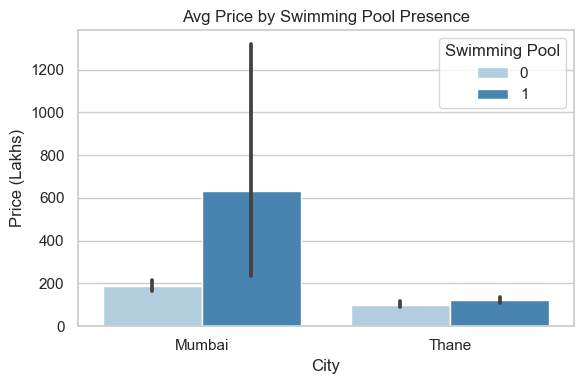

In [9]:
#visualisations

plt.figure(figsize=(6, 4))
sns.barplot(x='City', y='price_lakhs', hue='swimming_pool', data=combined_impact, palette='Blues')
plt.title('Avg Price by Swimming Pool Presence')
plt.ylabel('Price (Lakhs)')
plt.legend(title='Swimming Pool')
plt.tight_layout()
plt.show()

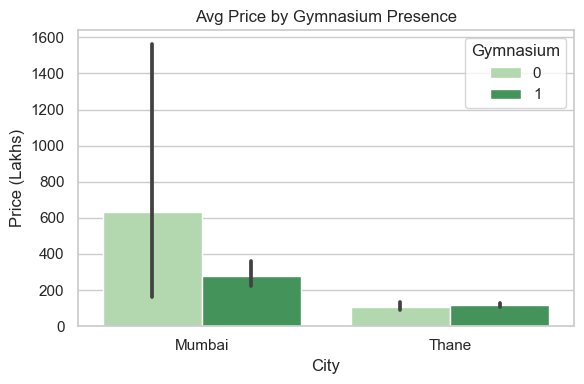

In [10]:
#gym impact

plt.figure(figsize=(6, 4))
sns.barplot(x='City', y='price_lakhs', hue='gymnasium', data=combined_impact, palette='Greens')
plt.title('Avg Price by Gymnasium Presence')
plt.ylabel('Price (Lakhs)')
plt.legend(title='Gymnasium')
plt.tight_layout()
plt.show()

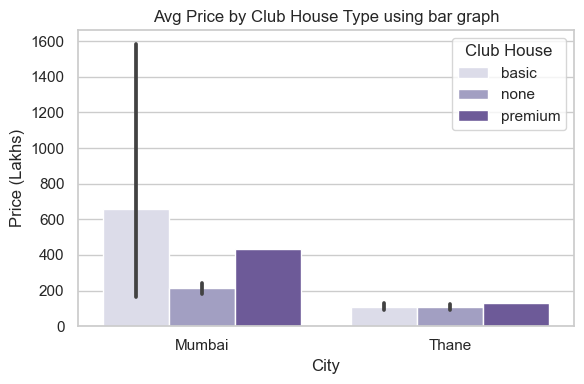

In [12]:
#club house impact
plt.figure(figsize=(6, 4))
sns.barplot(x='City', y='price_lakhs', hue='clubhouse_type', data=combined_impact, palette='Purples')
plt.title('Avg Price by Club House Type using bar graph')
plt.ylabel('Price (Lakhs)')
plt.legend(title='Club House')
plt.tight_layout()
plt.show()

In [ ]:
#insight:n Mumbai, properties with swimming pools and gymnasiums show a clear price premium, reflecting lifestyle-driven demand. Club house presence also correlates with higher pricing, especially in branded developments.
In Thane, the price uplift from amenities is more moderate—suggesting buyers prioritize space and affordability over luxury features.
Overall, swimming pools and gymnasiums add the most value in Mumbai, while club houses show mixed impact across both cities

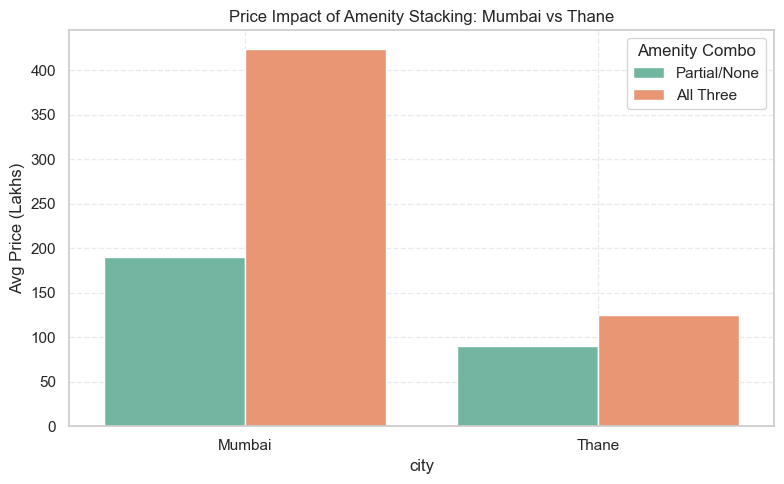

In [13]:
#additional insights

#amenity stacking

df['has_all_three'] = (df['swimming_pool'] == 1) & (df['gymnasium'] == 1) & (df['clubhouse_type'] != 0)

stacked_impact = df[df['city'].isin(['Mumbai', 'Thane'])].groupby(['city', 'has_all_three'])['price_lakhs'].mean().reset_index()
stacked_impact['Amenity Combo'] = stacked_impact['has_all_three'].map({True: 'All Three', False: 'Partial/None'})

plt.figure(figsize=(8, 5))
sns.barplot(x='city', y='price_lakhs', hue='Amenity Combo', data=stacked_impact, palette='Set2')
plt.title('Price Impact of Amenity Stacking: Mumbai vs Thane')
plt.ylabel('Avg Price (Lakhs)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

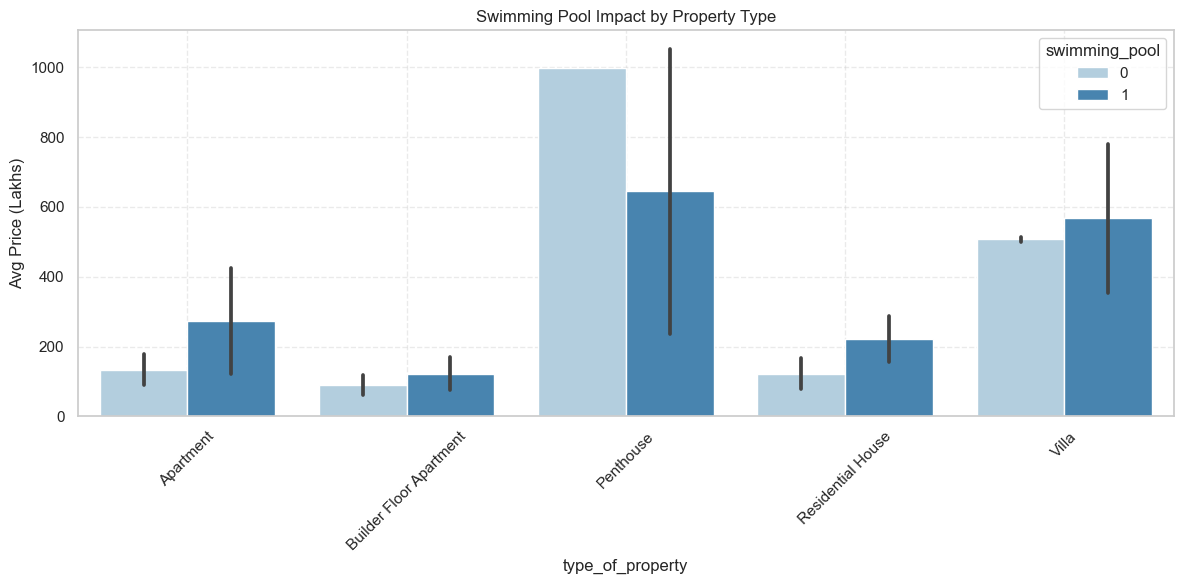

In [14]:
#amenity impact by property type

amenity_type_impact = df[df['city'].isin(['Mumbai', 'Thane'])].groupby(['city', 'type_of_property', 'swimming_pool'])['price_lakhs'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='type_of_property', y='price_lakhs', hue='swimming_pool', data=amenity_type_impact, palette='Blues')
plt.title('Swimming Pool Impact by Property Type')
plt.ylabel('Avg Price (Lakhs)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

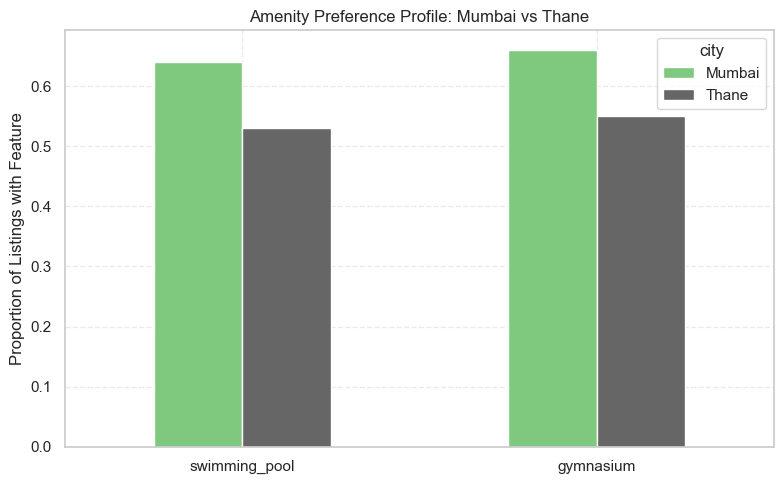

In [15]:
#amenity preference by city

amenity_pref = df[df['city'].isin(['Mumbai', 'Thane'])][['city', 'swimming_pool', 'gymnasium', 'clubhouse_type']]
amenity_pref_summary = amenity_pref.groupby('city').mean().round(2).reset_index()

amenity_pref_summary.set_index('city').T.plot(kind='bar', figsize=(8, 5), colormap='Accent')
plt.title('Amenity Preference Profile: Mumbai vs Thane')
plt.ylabel('Proportion of Listings with Feature')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()